In [2]:
# Packages

%matplotlib inline
import numpy as np
#import dicom
#import pydicom as d

import os
import time 

import matplotlib as mt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from keras.utils.vis_utils import plot_model
from PIL import Image


from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import Callback
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.layers import Input, Conv3D, MaxPooling3D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

import tensorflow as tf

print(os.listdir('2000_images'))
tf.__version__

['test', 'train']


'2.8.0'

In [3]:
# Classification Model
CLASSIFY_INPUT_WIDTH, CLASSIFY_INPUT_HEIGHT, CLASSIFY_INPUT_DEPTH, CLASSIFY_INPUT_CHANNEL = 64,64,64,3

inputs = Input((CLASSIFY_INPUT_WIDTH, CLASSIFY_INPUT_HEIGHT, CLASSIFY_INPUT_DEPTH, CLASSIFY_INPUT_CHANNEL))


x = Conv3D(32, (3, 3, 3), padding='same', activation='relu')(inputs)
x = MaxPooling3D(pool_size=(2, 2, 2))(x)


x=Flatten()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=(x))

METRICS = [tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.Precision(name="precision"), tf.keras.metrics.Recall(name="recall")]

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=METRICS)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 64, 3)]   0         
                                                                 
 conv3d (Conv3D)             (None, 64, 64, 64, 32)    2624      
                                                                 
 max_pooling3d (MaxPooling3D  (None, 32, 32, 32, 32)   0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1048576)           0         
                                                                 
 dense (Dense)               (None, 1)                 1048577   
                                                                 
Total params: 1,051,201
Trainable params: 1,051,201
Non-trainable params: 0
___________________________________________________

In [4]:
# Train and Test the model
start= time.time()


train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


training_set = train_datagen.flow_from_directory("2000_images/train",
                                                 target_size = (64,64,64),
                                                 batch_size = 8,
                                                 class_mode =  'binary')

test_set = test_datagen.flow_from_directory("2000_images/test",
                                            target_size = (64,64,64),
                                            batch_size = 8,
                                            class_mode =  'binary')


Found 1400 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [13]:
res1=model.fit(training_set, batch_size=8, steps_per_epoch = 10, epochs = 1, validation_data=test_set)

print("Done in %.2f s." % (time.time() - start))


TypeError: AdaBoostClassifier.fit() got an unexpected keyword argument 'batch_size'

------------------------------------------------------------
------------------------------------------------------------
Lung Cancer Detected !
------------------------------------------------------------


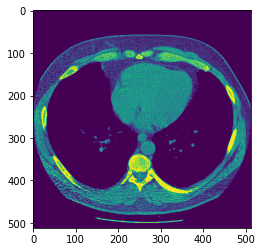

------------------------------------------------------------


In [8]:
imdim = (64,64,64,3)
print('-'*60)                                              

enterimg = input("Enter the path of image ")   
test_image = image.load_img(enterimg)
print('-'*60)                                              

test_image = image.img_to_array(test_image).reshape((imdim[0],imdim[1],imdim[2],imdim[3]))
test_image = np.expand_dims(test_image, axis=0)

result = model.predict(test_image)
training_set.class_indices


if result[0][0] == 1:
    prediction = 'Found'
    print('Lung Cancer Detected !')
else:
    print('Lung Cancer is not detected !')
    
print('-'*60)                                              



# display result
img = mpimg.imread(enterimg)
imgplot = plt.imshow(img)
plt.show()

print('-'*60)                                              


In [9]:
# Analysis



train_pre = res1.history['precision'][-1]
train_re = res1.history['recall'][-1]
test_pre = res1.history['precision'][-1]
test_re = res1.history['recall'][-1]

print('\nTRAIN METRIC ----------------------')
print('Train Accuracy: {}'.format(np.round((res1.history['binary_accuracy'][-1])*100, 2)))
print('Train Precision: {}'.format(np.round((train_pre)*100, 2)))
print('Train Recall: {}'.format(np.round((train_re)*100, 2)))
print('Train F1-score: {}'.format(np.round((2*(train_re * train_pre)/(train_re + train_pre))*100, 2)))

print('\nTEST METRIC ----------------------')
print('Test Accuracy: {}'.format(np.round((res1.history['val_binary_accuracy'][-1])*100, 2)))
print('Test Precision: {}'.format(np.round((test_pre)*100, 2)))
print('Test Recall: {}'.format(np.round((test_re)*100, 2)))
print('Test F1-score: {}'.format(np.round((2*(test_re * test_pre)/(test_re + test_pre))*100, 2)))










TRAIN METRIC ----------------------
Train Accuracy: 77.5
Train Precision: 82.67
Train Recall: 92.54
Train F1-score: 87.32

TEST METRIC ----------------------
Test Accuracy: 86.0
Test Precision: 82.67
Test Recall: 92.54
Test F1-score: 87.32

TRAIN METRIC ----------------------
Train Accuracy: 86.25
Train Precision: 86.25
Train Recall: 100.0
Train F1-score: 92.62

TEST METRIC ----------------------
Test Accuracy: 89.83
Test Precision: 86.25
Test Recall: 100.0
Test F1-score: 92.62

TRAIN METRIC ----------------------
Train Accuracy: 87.5
Train Precision: 87.5
Train Recall: 100.0
Train F1-score: 93.33

TEST METRIC ----------------------
Test Accuracy: 86.67
Test Precision: 87.5
Test Recall: 100.0
Test F1-score: 93.33
